# Implementation of Random Forest for forecasting

In [103]:
import warnings
warnings.filterwarnings('ignore')

In [104]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [105]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [106]:
path = "/content/drive/MyDrive/Colab Notebooks/Supply-Chain-Forecast-main/Supply-Chain-Forecast-main/Data/df_time_series.xlsx"

In [107]:
import pandas as pd

df = pd.read_excel(path)
df.head(5)

,CLORURO DE SODIO,LACTATO DE SODIO,METAMIZOL,PARACETAMOL,PROPOFOL,Año,FECHA
0,8085.68,8543.5,19910.44,11596.50,34.82,2020,2020-01-01
1,19.00,0.0,7.56,3.00,0.00,2020,2020-01-16
2,8748.72,9012.0,19368.24,11092.85,51.00,2020,2020-01-31
3,73.50,0.0,2.52,3.00,1.00,2020,2020-02-15
4,8229.89,7688.0,18505.16,11746.15,20.58,2020,2020-03-01


In [108]:
target_columns = ['CLORURO DE SODIO', 'LACTATO DE SODIO', 'METAMIZOL', 'PARACETAMOL', 'PROPOFOL']
n_lags = 15


for col in target_columns:
    for lag in range(1, n_lags + 1):
        df[f'{col}_lag_{lag}'] = df[col].shift(lag)


df = df.dropna().reset_index(drop=True)


In [109]:
df.head(5)

,CLORURO DE SODIO,LACTATO DE SODIO,METAMIZOL,PARACETAMOL,PROPOFOL,Año,FECHA,CLORURO DE SODIO_lag_1,CLORURO DE SODIO_lag_2,CLORURO DE SODIO_lag_3,...,PROPOFOL_lag_6,PROPOFOL_lag_7,PROPOFOL_lag_8,PROPOFOL_lag_9,PROPOFOL_lag_10,PROPOFOL_lag_11,PROPOFOL_lag_12,PROPOFOL_lag_13,PROPOFOL_lag_14,PROPOFOL_lag_15
0,48.00,0.0,0.00,0.000,0.00,2020,2020-08-13,8151.68,21.50,7968.63,...,0.00,10.90,1.00,8.97,0.50,20.58,1.00,51.00,0.00,34.82
1,9174.35,7612.5,19533.72,11829.625,40.13,2020,2020-08-28,48.00,8151.68,21.50,...,24.06,0.00,10.90,1.00,8.97,0.50,20.58,1.00,51.00,0.00
2,54.75,0.0,0.00,0.000,0.00,2020,2020-09-12,9174.35,48.00,8151.68,...,1.00,24.06,0.00,10.90,1.00,8.97,0.50,20.58,1.00,51.00
3,9473.13,7314.5,21174.52,12181.450,61.38,2020,2020-09-27,54.75,9174.35,48.00,...,29.11,1.00,24.06,0.00,10.90,1.00,8.97,0.50,20.58,1.00
4,54.85,0.0,0.00,0.000,1.10,2020,2020-10-12,9473.13,54.75,9174.35,...,0.20,29.11,1.00,24.06,0.00,10.90,1.00,8.97,0.50,20.58


In [123]:
df['FECHA'].min()

Timestamp('2020-08-13 00:00:00')

In [124]:
df['FECHA'].max()

Timestamp('2023-11-26 00:00:00')

In [126]:
df[['CLORURO DE SODIO','LACTATO DE SODIO',	'METAMIZOL',	'PARACETAMOL',	'PROPOFOL']].corr()

,CLORURO DE SODIO,LACTATO DE SODIO,METAMIZOL,PARACETAMOL,PROPOFOL
CLORURO DE SODIO,1.000000,0.916569,0.909340,0.892776,0.544671
LACTATO DE SODIO,0.916569,1.000000,0.902823,0.904999,0.537805
METAMIZOL,0.909340,0.902823,1.000000,0.888888,0.485347
PARACETAMOL,0.892776,0.904999,0.888888,1.000000,0.480329
PROPOFOL,0.544671,0.537805,0.485347,0.480329,1.000000


In [110]:
# Columnas de entrada (todas las columnas con "_lag_")
X = df[[col for col in df.columns if '_lag_' in col]]

# Columnas de salida (los valores actuales que queremos predecir)
y = df[target_columns]


In [111]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, shuffle=False, test_size=0.2)


In [112]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.multioutput import MultiOutputRegressor
from sklearn.metrics import mean_squared_error

model = MultiOutputRegressor(RandomForestRegressor(n_estimators=100, random_state=42))
model.fit(X_train, y_train)

y_pred = model.predict(X_test)


In [113]:
# Error por cada variable
for i, col in enumerate(target_columns):
    mse = mean_squared_error(y_test.iloc[:, i], y_pred[:, i])
    print(f'{col} - MSE: {mse:.2f}')


CLORURO DE SODIO - MSE: 616018.92
LACTATO DE SODIO - MSE: 778634.28
METAMIZOL - MSE: 522342.66
PARACETAMOL - MSE: 4081695.54
PROPOFOL - MSE: 271.13


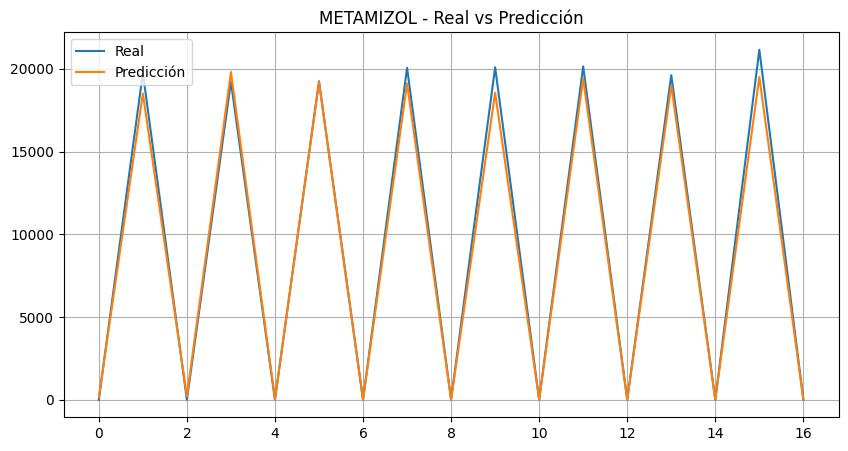

In [114]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(y_test['METAMIZOL'].values, label='Real')
plt.plot(y_pred[:, target_columns.index('METAMIZOL')], label='Predicción')
plt.title('METAMIZOL - Real vs Predicción')
plt.legend()
plt.grid(True)
plt.show()


In [115]:
future_df = pd.DataFrame(predictions, columns=target_columns)
future_df.index.name = 'Día'
print(future_df)


     CLORURO DE SODIO  LACTATO DE SODIO   METAMIZOL  PARACETAMOL  PROPOFOL
Día                                                                       
0           8650.3160          7782.980  19108.8280  11842.09940   91.2159
1             58.4924             2.695     17.6896      0.21000    0.8960
2           8168.8029          7110.140  18766.0604  10694.44855   46.5235
3             90.4255             6.840      1.0792      0.15000    0.6002


In [116]:
import numpy as np

n_future = 4  # días a predecir
last_known = df.copy()  # copia con últimos valores disponibles

predictions = []

for _ in range(n_future):
    # Crear la fila de entrada para el próximo día
    last_input = []

    for col in target_columns:
        # Tomar los últimos 'n_lags' valores conocidos o predichos
        vals = last_known[col].values[-n_lags:]
        last_input.extend(vals[::-1])  # invertir para que lag_1 sea el más reciente

    # Convertir a array 2D para el modelo
    input_array = np.array(last_input).reshape(1, -1)

    # Predecir siguiente día
    next_pred = model.predict(input_array)[0]  # array de 5 valores
    predictions.append(next_pred)

    # Crear un nuevo registro con las predicciones
    new_row = dict(zip(target_columns, next_pred))
    for col in target_columns:
        for lag in range(1, n_lags + 1):
            new_row[f'{col}_lag_{lag}'] = last_known[col].values[-lag]

    # Agregar la predicción a last_known para usarla en el siguiente ciclo
    last_known = pd.concat([last_known, pd.DataFrame([new_row])], ignore_index=True)


In [117]:
# Asegura que la columna de fecha esté en formato datetime
df['FECHA'] = pd.to_datetime(df['FECHA'])

# Última fecha del dataset
last_date = df['FECHA'].max()


In [118]:
from datetime import timedelta

n_future = len(future_df)  # ya definido antes
future_dates = pd.date_range(start=last_date + timedelta(days=15),
                             periods=n_future, freq='15D')

# Asignar al DataFrame de predicciones
future_df['FECHA'] = future_dates
future_df.set_index('FECHA', inplace=True)


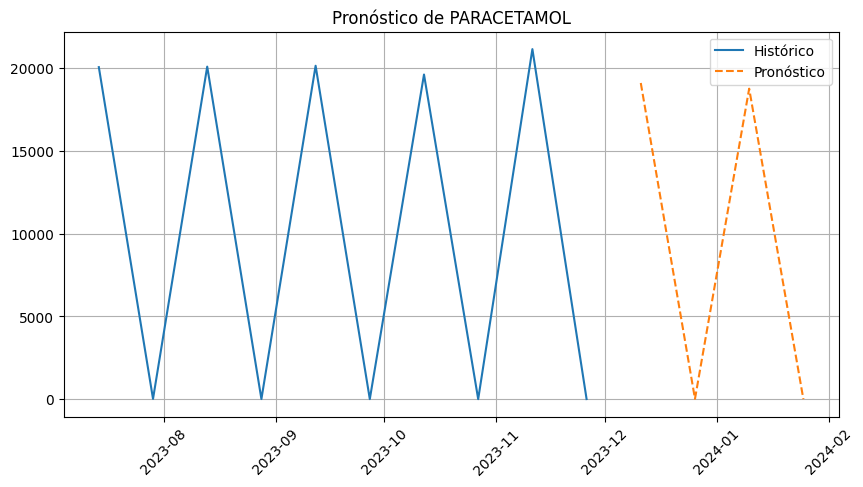

In [119]:
plt.figure(figsize=(10, 5))
plt.plot(df['FECHA'].iloc[-10:], df['METAMIZOL'].iloc[-10:], label='Histórico')
plt.plot(future_df.index, future_df['METAMIZOL'], label='Pronóstico', linestyle='--')
plt.title('Pronóstico de PARACETAMOL')
plt.xticks(rotation=45)
plt.grid()
plt.legend()
plt.show()


In [120]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, median_absolute_error, max_error, explained_variance_score

import numpy as np
import pandas as pd

def mean_absolute_percentage_error(y_true, y_pred):
    return np.mean(np.abs((y_true - y_pred) / np.clip(np.abs(y_true), 1e-8, None))) * 100


In [121]:
metrics = []

for i, col in enumerate(target_columns):
    y_true = y_test.iloc[:, i].values
    y_hat = y_pred[:, i]

    mse = mean_squared_error(y_true, y_hat)
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(y_true, y_hat)
    mape = mean_absolute_percentage_error(y_true, y_hat)
    r2 = r2_score(y_true, y_hat)
    medae = median_absolute_error(y_true, y_hat)
    maxerr = max_error(y_true, y_hat)
    evs = explained_variance_score(y_true, y_hat)

    metrics.append({
        'Variable': col,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'MAPE (%)': mape,
        'R²': r2,
        'MedAE': medae,
        'MaxError': maxerr,
        'Explained Variance': evs
    })


In [122]:
metrics_df = pd.DataFrame(metrics)
metrics_df.set_index('Variable', inplace=True)
print(metrics_df.round(3))


                          MSE      RMSE       MAE      MAPE (%)     R²  \
Variable                                                                 
CLORURO DE SODIO   616018.925   784.869   431.314  3.506500e+01  0.972   
LACTATO DE SODIO   778634.282   882.403   516.388  5.858235e+10  0.956   
METAMIZOL          522342.656   722.733   459.147  7.538832e+08  0.995   
PARACETAMOL       4081695.540  2020.321  1288.067  6.105279e+10  0.933   
PROPOFOL              271.133    16.466     9.320  8.754100e+01  0.315   

                    MedAE  MaxError  Explained Variance  
Variable                                                 
CLORURO DE SODIO   76.550  2281.656               0.978  
LACTATO DE SODIO   36.750  2274.045               0.958  
METAMIZOL         146.414  1645.591               0.996  
PARACETAMOL        53.553  5503.091               0.960  
PROPOFOL            2.795    53.946               0.365  
